<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 03: NYC 311 Service Request Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

# Data Acquisition



In [1]:
#import required Library
import pandas as pd
from pandas import Series , DataFrame , datetime
import numpy as np

from scipy import stats



In [10]:
# import NYC-311 services request csv file
    
NYC_311_df = pd.read_csv('/Users/Marwaalgethami/Desktop/data science/projects/Projects/Projects for Submission/Project3_NYC311/311_Service_Requests_from_2010_to_Present.csv', low_memory = False)
#preview the file data
NYC_311_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [13]:
df_cols_rmv = NYC_311_df[['Park Facility Name',     'Park Borough',         'School Name',
               'School Number',          'School Region',        'School Code', 
               'School Phone Number',    'School Address',       'School City', 
               'School State',           'School Zip',           'School Not Found', 
               'School or Citywide Complaint',
               'Vehicle Type', 
               'Taxi Company Borough', 
               'Taxi Pick Up Location', 
               'Bridge Highway Name',
               'Bridge Highway Direction', 
               'Road Ramp', 
               'Bridge Highway Segment', 
               'Garage Lot Name',
               'Ferry Direction', 
               'Ferry Terminal Name', 
               'Location', 
               'Address Type', 
               'Agency Name',
               'Resolution Action Updated Date', 
               'Descriptor']]



In [14]:
NYC_311_df.drop(df_cols_rmv, inplace=True, axis=1)



In [23]:
NYC_311_df.isnull().sum()


Unique Key                         0
Created Date                       0
Closed Date                     2381
Agency                             0
Complaint Type                     0
Location Type                    133
Incident Zip                    2998
Incident Address               51699
Street Name                    51699
Cross Street 1                 57188
Cross Street 2                 57805
Intersection Street 1         313438
Intersection Street 2         314046
City                            2997
Landmark                      364183
Facility Type                   2389
Status                             0
Due Date                           3
Resolution Description             0
Community Board                    0
Borough                            0
X Coordinate (State Plane)      4030
Y Coordinate (State Plane)      4030
Latitude                        4030
Longitude                       4030
dtype: int64

In [48]:
NYC_311_df.dropna(subset = ['City'])

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,Status,Due Date,Resolution Description,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,Noise - Street/Sidewalk,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,40.865682,-73.923501,0 days 00:55:30
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,Blocked Driveway,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,...,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01 QUEENS,QUEENS,1007766.0,221986.0,40.775945,-73.915094,0 days 01:27:13
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,Blocked Driveway,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,07 BRONX,BRONX,1015081.0,256380.0,40.870325,-73.888525,0 days 04:51:34
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,Illegal Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,10 BRONX,BRONX,1031740.0,243899.0,40.835994,-73.828379,0 days 07:45:27
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,Illegal Parking,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,04 QUEENS,QUEENS,1019123.0,206375.0,40.733060,-73.874170,0 days 03:27:44
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,NYPD,Illegal Parking,Street/Sidewalk,11215.0,260 21 STREET,21 STREET,5 AVENUE,...,Closed,01/01/2016 07:56:30 AM,The Police Department responded and upon arriv...,07 BROOKLYN,BROOKLYN,986312.0,180032.0,40.660823,-73.992568,0 days 01:53:41
6,32306559,2015-12-31 23:55:32,2016-01-01 01:53:54,NYPD,Illegal Parking,Street/Sidewalk,10032.0,524 WEST 169 STREET,WEST 169 STREET,AMSTERDAM AVENUE,...,Closed,01/01/2016 07:55:32 AM,The Police Department issued a summons in resp...,12 MANHATTAN,MANHATTAN,1001578.0,245627.0,40.840848,-73.937375,0 days 01:58:22
7,32307009,2015-12-31 23:54:05,2016-01-01 01:42:54,NYPD,Blocked Driveway,Street/Sidewalk,10457.0,501 EAST 171 STREET,EAST 171 STREET,WASHINGTON AVENUE,...,Closed,01/01/2016 07:54:05 AM,The Police Department responded to the complai...,03 BRONX,BRONX,1011117.0,244417.0,40.837503,-73.902905,0 days 01:48:49
8,32308581,2015-12-31 23:53:58,2016-01-01 08:27:32,NYPD,Illegal Parking,Street/Sidewalk,11415.0,83-44 LEFFERTS BOULEVARD,LEFFERTS BOULEVARD,BEND,...,Closed,01/01/2016 07:53:58 AM,The Police Department responded to the complai...,09 QUEENS,QUEENS,1030662.0,196163.0,40.704977,-73.832605,0 days 08:33:34
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:40,NYPD,Blocked Driveway,Street/Sidewalk,11219.0,1408 66 STREET,66 STREET,14 AVENUE,...,Closed,01/01/2016 07:53:58 AM,The Police Department responded and upon arriv...,11 BROOKLYN,BROOKLYN,984378.0,166541.0,40.623793,-73.999539,0 days 01:23:42


In [49]:
City_Complaint_Type = pd.crosstab( NYC_311_df.City, NYC_311_df['Complaint Type'])
City_Complaint_Type

Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,46,0,0,50,32,2,1,1,4,0,...,14,2,29,10,1,0,0,1,1,1
ASTORIA,170,0,16,3436,426,5,43,4,32,4,...,21,64,409,236,2,3,0,60,10,57
Astoria,0,0,0,159,14,0,0,0,0,0,...,0,0,145,0,0,0,0,0,0,0
BAYSIDE,53,0,0,514,231,2,1,3,2,0,...,3,4,17,24,0,0,0,9,0,2
BELLEROSE,15,0,1,138,120,2,1,0,1,1,...,1,1,13,11,1,1,0,9,1,0
BREEZY POINT,2,0,0,3,3,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
BRONX,1971,0,22,17063,2403,66,206,15,275,24,...,90,548,9146,3556,20,18,0,427,54,433
BROOKLYN,3191,0,124,36447,6259,79,291,60,948,61,...,389,1575,13984,5966,49,58,0,1258,155,575
CAMBRIA HEIGHTS,15,0,0,177,148,0,0,0,6,1,...,2,0,29,100,0,0,0,7,0,0


Obsevation:
- The most type of complaint in Newyork is Noise - Street/Sidewalk


In [70]:
City_Complaint_Type.sum()

Complaint Type
Animal Abuse                  10529
Animal in a Park                  1
Bike/Roller/Skate Chronic       473
Blocked Driveway             100548
Derelict Vehicle              21460
Disorderly Youth                315
Drinking                       1401
Graffiti                        157
Homeless Encampment            4878
Illegal Fireworks               172
Illegal Parking               91412
Noise - Commercial            43687
Noise - House of Worship       1068
Noise - Park                   4083
Noise - Street/Sidewalk       51054
Noise - Vehicle               19294
Panhandling                     324
Posting Advertisement           680
Squeegee                          4
Traffic                        5195
Urinating in Public             641
Vending                        4185
dtype: int64

- Obsevation:
- Blocked Driveway the most common Complaint Type in file


In [27]:
NYC_311_df.dropna(subset= ['Closed Date'])



,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,Facility Type,Status,Due Date,Resolution Description,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,Noise - Street/Sidewalk,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,40.865682,-73.923501
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,Blocked Driveway,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,...,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01 QUEENS,QUEENS,1007766.0,221986.0,40.775945,-73.915094
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,Blocked Driveway,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,Precinct,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,07 BRONX,BRONX,1015081.0,256380.0,40.870325,-73.888525
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,Illegal Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,Precinct,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,10 BRONX,BRONX,1031740.0,243899.0,40.835994,-73.828379
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,Illegal Parking,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,Precinct,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,04 QUEENS,QUEENS,1019123.0,206375.0,40.733060,-73.874170
5,32306554,12/31/2015 11:56:30 PM,01/01/2016 01:50:11 AM,NYPD,Illegal Parking,Street/Sidewalk,11215.0,260 21 STREET,21 STREET,5 AVENUE,...,Precinct,Closed,01/01/2016 07:56:30 AM,The Police Department responded and upon arriv...,07 BROOKLYN,BROOKLYN,986312.0,180032.0,40.660823,-73.992568
6,32306559,12/31/2015 11:55:32 PM,01/01/2016 01:53:54 AM,NYPD,Illegal Parking,Street/Sidewalk,10032.0,524 WEST 169 STREET,WEST 169 STREET,AMSTERDAM AVENUE,...,Precinct,Closed,01/01/2016 07:55:32 AM,The Police Department issued a summons in resp...,12 MANHATTAN,MANHATTAN,1001578.0,245627.0,40.840848,-73.937375
7,32307009,12/31/2015 11:54:05 PM,01/01/2016 01:42:54 AM,NYPD,Blocked Driveway,Street/Sidewalk,10457.0,501 EAST 171 STREET,EAST 171 STREET,WASHINGTON AVENUE,...,Precinct,Closed,01/01/2016 07:54:05 AM,The Police Department responded to the complai...,03 BRONX,BRONX,1011117.0,244417.0,40.837503,-73.902905
8,32308581,12/31/2015 11:53:58 PM,01/01/2016 08:27:32 AM,NYPD,Illegal Parking,Street/Sidewalk,11415.0,83-44 LEFFERTS BOULEVARD,LEFFERTS BOULEVARD,BEND,...,Precinct,Closed,01/01/2016 07:53:58 AM,The Police Department responded to the complai...,09 QUEENS,QUEENS,1030662.0,196163.0,40.704977,-73.832605
9,32308391,12/31/2015 11:53:58 PM,01/01/2016 01:17:40 AM,NYPD,Blocked Driveway,Street/Sidewalk,11219.0,1408 66 STREET,66 STREET,14 AVENUE,...,Precinct,Closed,01/01/2016 07:53:58 AM,The Police Department responded and upon arriv...,11 BROOKLYN,BROOKLYN,984378.0,166541.0,40.623793,-73.999539


In [29]:
#2 - convert the columns ‘Created Date’ and Closed Date’ to datetime datatype 
NYC_311_df['Created Date']= pd.to_datetime(NYC_311_df['Created Date'])
NYC_311_df['Closed Date']= pd.to_datetime(NYC_311_df['Closed Date'])




In [30]:
NYC_311_df['Request_Closing_Time'] = NYC_311_df["Closed Date"] - NYC_311_df["Created Date"]

NYC_311_df['Request_Closing_Time'].head(3)

0   00:55:30
1   01:27:13
2   04:51:34
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [31]:
NYC_311_df.Request_Closing_Time.describe()

count                    362177
mean     0 days 04:11:53.299632
std      0 days 05:51:42.547519
min             0 days 00:01:01
25%             0 days 01:15:33
50%             0 days 02:40:16
75%             0 days 05:14:38
max            24 days 16:52:22
Name: Request_Closing_Time, dtype: object

In [32]:
columns_subset = NYC_311_df[['Complaint Type',  'Location Type' , 'Request_Closing_Time']]



In [40]:
columns_subset.head()

,Complaint Type,Location Type,Request_Closing_Time
0,Noise - Street/Sidewalk,Street/Sidewalk,3330
1,Blocked Driveway,Street/Sidewalk,5233
2,Blocked Driveway,Street/Sidewalk,17494
3,Illegal Parking,Street/Sidewalk,27927
4,Illegal Parking,Street/Sidewalk,12464


In [37]:
columns_subset = columns_subset.dropna(subset = ['Request_Closing_Time'])


In [38]:
columns_subset['Request_Closing_Time'] = columns_subset.Request_Closing_Time.astype('timedelta64[s]').astype(int)
columns_subset['Request_Closing_Time'].head(5)



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0     3330
1     5233
2    17494
3    27927
4    12464
Name: Request_Closing_Time, dtype: int64

In [39]:
columns_subset.groupby(['Complaint Type']).mean()

,Request_Closing_Time
Complaint Type,
Agency Issues,1.828912e+04
Animal Abuse,1.803256e+04
Animal in a Park,1.212634e+06
Bike/Roller/Skate Chronic,1.312369e+04
Blocked Driveway,1.623252e+04
Derelict Vehicle,2.535960e+04
Disorderly Youth,1.236375e+04
Drinking,1.382130e+04
Graffiti,2.327634e+04


In [41]:
columns_subset.Request_Closing_Time.mean()

15113.299632500131

In [58]:
#4
Order_data = columns_subset.groupby(['Location Type' , 'Complaint Type' ], as_index= True).mean()

In [59]:
Order_data.head(30)

Request_Closing_Time
Location Type              Complaint Type                                 
Bridge                     Homeless Encampment                1.376750e+04
Club/Bar/Restaurant        Drinking                           1.568058e+04
                           Noise - Commercial                 1.088996e+04
                           Urinating in Public                2.556796e+04
Commercial                 Animal Abuse                       1.623899e+04
Highway                    Derelict Vehicle                   2.537128e+04
                           Homeless Encampment                1.142958e+04
                           Traffic                            1.129257e+04
House and Store            Animal Abuse                       1.750501e+04
House of Worship           Noise - House of Worship           1.140317e+04
Park                       Animal in a Park                   1.212634e+06
Park/Playground            Animal Abuse                       1.343101e+04
                           Drinking                           1.242276e+04
                           Homeless Encampment                1.423202e+04
                           Illegal Fireworks                  1.638822e+04
                           Noise - Park                       1.221990e+04
                           Panhandling                        4.387167e+03
                           Urinating in Public                9.988341e+03
                           Vending                            1.261368e+04
Parking Lot                Animal Abuse                       1.823671e+04
                           Posting Advertisement              7.617714e+03
Residential Building       Animal Abuse                       1.603562e+04
Residential Building/House Animal Abuse                       1.868705e+04
                           Bike/Roller/Skate Chronic          1.342132e+04
                           Disorderly Youth                   1.330009e+04
                           Drinking                           1.326183e+04
                           Graffiti                           1.955515e+04
                           Homeless Encampment                1.717520e+04
                           Illegal Fireworks                  1.206306e+04
                           Panhandling                        1.661345e+04

# Hypothesis Testing



In [42]:
Traffic = columns_subset[(columns_subset['Complaint Type'] == 'Traffic')]
Traffic.reset_index(inplace = True)
Traffic.head()

,index,Complaint Type,Location Type,Request_Closing_Time
0,130,Traffic,Street/Sidewalk,16083
1,311,Traffic,Street/Sidewalk,8653
2,334,Traffic,Street/Sidewalk,2292
3,336,Traffic,Street/Sidewalk,2552
4,337,Traffic,Street/Sidewalk,8879


In [43]:
Animal_Abuse = columns_subset[(columns_subset['Complaint Type'] == 'Animal Abuse')]
Animal_Abuse.reset_index(inplace = True)
Animal_Abuse.head()

,index,Complaint Type,Location Type,Request_Closing_Time
0,89,Animal Abuse,Residential Building/House,1570
1,140,Animal Abuse,Residential Building/House,4206
2,164,Animal Abuse,Residential Building/House,8095
3,189,Animal Abuse,Street/Sidewalk,9568
4,247,Animal Abuse,Residential Building/House,4262


In [44]:
stats.ttest_ind(Traffic['Request_Closing_Time'],Animal_Abuse['Request_Closing_Time'])

Ttest_indResult(statistic=-13.439401382124615, pvalue=5.978824462899485e-41)

In [45]:
p = stats.ttest_ind(Traffic['Request_Closing_Time'],Animal_Abuse['Request_Closing_Time'])[1]

In [46]:
p

5.978824462899485e-41

In [47]:
# interpret via p-value
alpha = .05
if p > alpha:
    print('Accept null hypothesis --> the means are equal.')
else:
    print('Reject the null hypothesis --> the means are NOT equal.')

Reject the null hypothesis --> the means are NOT equal.


# Exploratory Data Analysis (EDA) 



In [50]:
#import required libraries for Visulization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [62]:
Complaint_Type_Count = NYC_311_df.sort_values(by=['Complaint Type'])
Complaint_Type_Count = NYC_311_df['Complaint Type'].value_counts()
Complaint_Type_Count.head(10)

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint Type, dtype: int64

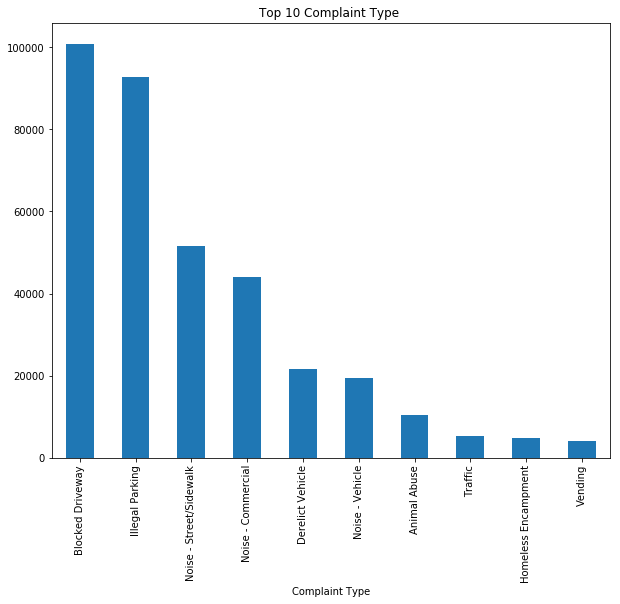

In [64]:
#plot a bar graph for top 10 Complaint 
plt.figure(figsize= (10,8))
plt.title('Top 10 Complaint Type ')
plt.xlabel('Complaint Type')
Complaint_Type_Count.head(10).plot("bar")

Observation:
Blocked Driveway has the most complaints, here is explore for it.
as result Brooklyn is the most efficted city.

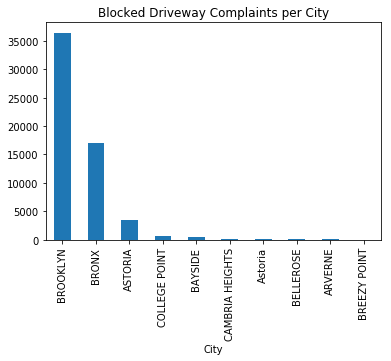

In [69]:
NYC_311_df[NYC_311_df['Complaint Type'] =='Blocked Driveway'].groupby('City').size()[:10].sort_values(ascending=False).plot(kind='bar',
                                                                            title='Blocked Driveway Complaints per City');

Text(0.5, 1.0, 'Processing Time of Complaints ')

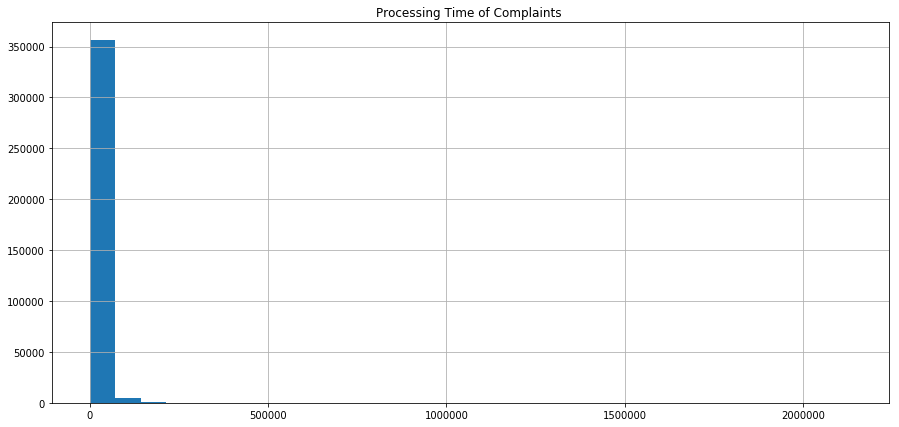

In [79]:
columns_subset['Request_Closing_Time'].hist(bins=30, figsize=(15,7));
plt.title("Processing Time of Complaints ")

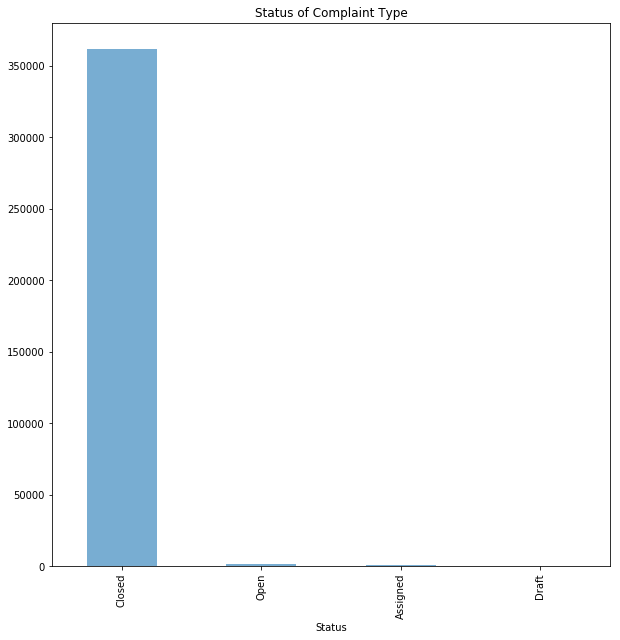

In [78]:
NYC_311_df['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(10,10))
plt.title("Status of Complaint Type")
plt.xlabel("Status")
plt.show()

Observation:
 most of all Complaints are closed.